<a href="https://colab.research.google.com/github/bhuiyanmobasshir94/Cow-weight-and-Breed-Prediction/blob/main/notebooks/1%3C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pathlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
## Globals 
YT_IMAGE_TO_TAKE = 4

In [3]:
images_dataset_url = "https://cv-datasets-2021.s3.amazonaws.com/images.tar.gz"
images_data_dir = tf.keras.utils.get_file(origin=images_dataset_url,
                                   fname='images',
                                   untar=True)
images_data_dir = pathlib.Path(images_data_dir)

833060864/833046463 [==============================] - 14s 0us/step


In [4]:
yt_images_dataset_url = "https://cv-datasets-2021.s3.amazonaws.com/yt_images.tar.gz"
yt_images_data_dir = tf.keras.utils.get_file(origin=yt_images_dataset_url,
                                   fname='yt_images',
                                   untar=True)
yt_images_data_dir = pathlib.Path(yt_images_data_dir)

4027006976/4026992587 [==============================] - 86s 0us/step


In [5]:
if sys.platform == 'darwin':
  os.system(f"dot_clean {images_data_dir}")
  os.system(f"dot_clean {yt_images_data_dir}")
elif sys.platform.startswith("lin"):
  os.system(f"cd {images_data_dir} && find . -type f -name '._*' -delete")
  os.system(f"cd {yt_images_data_dir} && find . -type f -name '._*' -delete")


In [6]:
image_count = len(list(images_data_dir.glob('*/*.jpg')))
print(image_count)

2056


In [7]:
yt_image_count = len(list(yt_images_data_dir.glob('*/*.jpg')))
print(yt_image_count)

15843


In [8]:
df = pd.read_csv("https://cv-datasets-2021.s3.amazonaws.com/dataset.csv")
df.shape

(513, 14)

In [9]:
df.columns

Index(['sku', 'sex', 'color', 'breed', 'feed', 'age_in_year', 'teeth',
       'height_in_inch', 'weight_in_kg', 'price', 'size', 'images_count',
       'yt_images_count', 'total_images'],
      dtype='object')

In [10]:
df.head(2)

,sku,sex,color,breed,feed,age_in_year,teeth,height_in_inch,weight_in_kg,price,size,images_count,yt_images_count,total_images
0,BLF 2340,MALE_BULL,RED,LOCAL,"['JUMBOO', 'LUCERNE', 'NAPIER', 'SILAGE', 'STR...",2.0,2,50.9,270.0,19000.0,MEDIUM,4,0,4
1,BLF 2342,MALE_BULL,NON_RED,LOCAL,"['JUMBOO', 'LUCERNE', 'NAPIER', 'SILAGE', 'STR...",2.0,2,52.0,256.0,18000.0,LARGE,4,31,35


In [40]:
images = list(images_data_dir.glob('*/*.jpg'))
yt_images = list(yt_images_data_dir.glob('*/*.jpg'))

In [43]:
from collections import defaultdict

resolutions = defaultdict(list)
for image in images:
  w, h = PIL.Image.open(str(image)).size
  resolutions[f'{(w,h)}'].append(1) 
resolutions = dict(resolutions)
for k in resolutions.keys():
  print(k, sum(resolutions[k]))

(1200, 675) 1536
(800, 450) 520


In [44]:
from collections import defaultdict

resolutions = defaultdict(list)
for image in yt_images:
  w, h = PIL.Image.open(str(image)).size
  resolutions[f'{(w,h)}'].append(1) 
resolutions = dict(resolutions)
for k in resolutions.keys():
  print(k, sum(resolutions[k]))

(1280, 720) 15843


In [12]:
min_height = 0
max_height = 0
min_width = 0
max_width = 0
for i, image in enumerate(images):
  w, h = PIL.Image.open(str(image)).size
  if i == 0:
    min_height = h
    max_height = h
    min_width = w
    max_width = w
  
  if h <= min_height:
    min_height = h
  if h >= max_height:
    max_height = h

  if w <= min_width:
    min_width = w
  if w >= max_width:
    max_width = w

print(f"min_height: {min_height}")
print(f"min_width: {min_width}")
print(f"max_height: {max_height}")
print(f"max_width: {max_width}")

min_height: 450
min_width: 800
max_height: 675
max_width: 1200


In [13]:
min_height = 0
max_height = 0
min_width = 0
max_width = 0
for i, image in enumerate(yt_images):
  w, h = PIL.Image.open(str(image)).size
  if i == 0:
    min_height = h
    max_height = h
    min_width = w
    max_width = w

  if h <= min_height:
    min_height = h
  if h >= max_height:
    max_height = h

  if w <= min_width:
    min_width = w
  if w >= max_width:
    max_width = w

print(f"min_height: {min_height}")
print(f"min_width: {min_width}")
print(f"max_height: {max_height}")
print(f"max_width: {max_width}")

min_height: 720
min_width: 1280
max_height: 720
max_width: 1280


In [14]:
f_df = pd.DataFrame(columns = ['file_path', 'teeth', 'age_in_year', 'breed', 'height_in_inch', 'weight_in_kg'])
for index, row in df.iterrows():
  images = list(images_data_dir.glob(f"{row['sku']}/*.jpg"))
  yt_images = list(yt_images_data_dir.glob(f"{row['sku']}/*.jpg"))

  for image in images:
    f_df = f_df.append({'file_path' : image, 'teeth' : row['teeth'], 'age_in_year' : row['age_in_year'], 'breed': row['breed'], 'height_in_inch': row['height_in_inch'], 'weight_in_kg': row['weight_in_kg']}, 
                ignore_index = True)
    
  for idx, image in enumerate(yt_images):
    if idx == (YT_IMAGE_TO_TAKE - 1):
      break
    f_df = f_df.append({'file_path' : image, 'teeth' : row['teeth'], 'age_in_year' : row['age_in_year'], 'breed': row['breed'], 'height_in_inch': row['height_in_inch'], 'weight_in_kg': row['weight_in_kg']}, 
                ignore_index = True)


In [15]:
f_df.shape

(3585, 6)

In [16]:
f_df.head(1)

,file_path,teeth,age_in_year,breed,height_in_inch,weight_in_kg
0,/root/.keras/datasets/images/BLF 2340/BLF 2340...,2,2.0,LOCAL,50.9,270.0


In [17]:
def label_encode(df):
  teeth_le = preprocessing.LabelEncoder()
  df['teeth']= teeth_le.fit_transform(df['teeth'])
  breed_le = preprocessing.LabelEncoder()
  df['breed']= breed_le.fit_transform(df['breed'])
  age_in_year_le = preprocessing.LabelEncoder()
  df['age_in_year']= age_in_year_le.fit_transform(df['age_in_year'])
  print(teeth_le.classes_)
  print(breed_le.classes_)
  print(age_in_year_le.classes_)
  return df

def inverse_transform(le, series=[]):
  return le.inverse_transform(series)


In [18]:
f_df = label_encode(f_df)

[2 4 6]
['BRAHMA' 'HOSTINE_CROSS' 'LOCAL' 'MIR_KADIM' 'PABNA_BREED'
 'RED_CHITTAGONG' 'SAHIWAL' 'SINDHI']
[2.  2.5 3. ]


In [19]:
# train_df, valid_test_df = train_test_split(f_df, test_size=0.3)
# validation_df, test_df = train_test_split(valid_test_df, test_size=0.3)
# print(f"train_df: {train_df.shape}")
# print(f"validation_df: {validation_df.shape}")
# print(f"test_df: {test_df.shape}")

train_df, test_df = train_test_split(f_df, test_size=0.1)
print(f"train_df: {train_df.shape}")
print(f"test_df: {test_df.shape}")

train_df: (3226, 6)
test_df: (359, 6)


In [20]:
# min_height: 450
# min_width: 800

# input: [image, teeth]
# outpur: [age_in_year, breed, height_in_inch, weight_in_kg]

# class CustomDataGen(tf.keras.utils.Sequence):
    
#     def __init__(self, df, X_col, y_col,
#                  batch_size,
#                  input_size=(450, 800, 3), # (input_height, input_width, input_channel)
#                  shuffle=True):
        
#         self.df = df.copy()
#         self.X_col = X_col
#         self.y_col = y_col
#         self.batch_size = batch_size
#         self.input_size = input_size
#         self.shuffle = shuffle
        
#         self.n = len(self.df)
#         # self.n_teeth = df[X_col['teeth']].max()
#         # self.n_breed = df[y_col['breed']].nunique()
    
#     def on_epoch_end(self):
#         if self.shuffle:
#             self.df = self.df.sample(frac=1).reset_index(drop=True)
    
#     def __get_input(self, path, target_size):
#         image = tf.keras.preprocessing.image.load_img(path)
#         image_arr = tf.keras.preprocessing.image.img_to_array(image)

#         # image_arr = image_arr[ymin:ymin+h, xmin:xmin+w]
#         image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()

#         return image_arr/255.
    
#     def __get_output(self, label, num_classes):
#         return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
#     def __get_data(self, batches):
#         # Generates data containing batch_size samples

#         path_batch = batches[self.X_col['file_path']]       
#         # teeth_batch = batches[self.X_col['teeth']]

#         # breed_batch = batches[self.y_col['breed']]
#         weight_in_kg_batch = batches[self.y_col['weight_in_kg']]
#         height_in_inch_batch = batches[self.y_col['height_in_inch']]
#         age_in_year_batch = batches[self.y_col['age_in_year']]

#         X0 = np.asarray([self.__get_input(x, self.input_size) for x in path_batch])

#         # y0_batch = np.asarray([self.__get_output(y, self.n_teeth) for y in teeth_batch])
#         # y1_batch = np.asarray([self.__get_output(y, self.n_breed) for y in breed_batch])

#         y0 = np.asarray([tf.cast(y, tf.float32) for y in weight_in_kg_batch])
#         y1 = np.asarray([tf.cast(y, tf.float32) for y in height_in_inch_batch])
#         y2 = np.asarray([tf.cast(y, tf.float32) for y in age_in_year_batch])

#         return X0, tuple([y0, y1, y2])
    
#     def __getitem__(self, index):
        
#         batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
#         X, y = self.__get_data(batches)        
#         return X, y
    
#     def __len__(self):
#         return self.n // self.batch_size

In [21]:
# traingen = CustomDataGen(train_df,
#                          X_col={'file_path':'file_path', 'teeth': 'teeth'},
#                          y_col={'breed': 'breed', 'weight_in_kg': 'weight_in_kg', 'height_in_inch': 'height_in_inch', 'age_in_year': 'age_in_year'},
#                          batch_size=128, input_size=(450, 800, 3))

In [22]:
# testgen = CustomDataGen(test_df,
#                          X_col={'file_path':'file_path', 'teeth': 'teeth'},
#                          y_col={'breed': 'breed', 'weight_in_kg': 'weight_in_kg', 'height_in_inch': 'height_in_inch', 'age_in_year': 'age_in_year'},
#                          batch_size=128, input_size=(450, 800, 3))

In [23]:
# validgen = CustomDataGen(validation_df,
#                          X_col={'file_path':'file_path', 'teeth': 'teeth'},
#                          y_col={'breed': 'breed', 'weight_in_kg': 'weight_in_kg', 'height_in_inch': 'height_in_inch', 'age_in_year': 'age_in_year'},
#                          batch_size=128, input_size=(450, 800, 3))

In [24]:
def __get_input(path, target_size):
  image = tf.keras.preprocessing.image.load_img(path)
  image_arr = tf.keras.preprocessing.image.img_to_array(image)
  image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
  return image_arr/255.

def data_loader(df, image_size=(450, 800, 3)):
  y0 = tf.cast(df.weight_in_kg, tf.float32)
  print(y0.shape)
  y1 = tf.cast(df.height_in_inch, tf.float32)
  print(y1.shape)
  # y2 = tf.cast(df.age_in_year, tf.float32)
  y2 = keras.utils.to_categorical(df.age_in_year)
  print(y2.shape)
  y3 = keras.utils.to_categorical(df.breed)
  print(y3.shape)

  path_batch = df.file_path
  X0 = tf.cast([__get_input(x, image_size) for x in path_batch], tf.float32)
  print(X0.shape)
  X1 = keras.utils.to_categorical(df.teeth)
  print(X1.shape)

  return (X0, X1), (y0, y1, y2, y3)

In [25]:
(X0, X1), (y0, y1, y2, y3) = data_loader(train_df, (150, 150, 3))

(3226,)
(3226,)
(3226, 3)
(3226, 8)
(3226, 150, 150, 3)
(3226, 3)


In [33]:
# input = keras.Input(shape=(128, 128, 3), name="original_img")
# x = layers.Conv2D(64, 3, activation="relu")(input)
# x = layers.Conv2D(128, 3, activation="relu")(x)
# x = layers.MaxPooling2D(3)(x)
# x = layers.Conv2D(128, 3, activation="relu")(x)
# x = layers.Conv2D(64, 3, activation="relu")(x)
# x = layers.GlobalMaxPooling2D()(x)

input0 = keras.Input(shape=(150, 150, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(input0)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)

# input1 = keras.Input(shape=(3,), name="teeth")


# out_a = keras.layers.Dense(1, activation='linear', name='wt_rg')(x)
out_b = keras.layers.Dense(1, activation='linear', name='ht_rg')(x)
# out_c = keras.layers.Dense(1, activation='linear', name='ag_rg')(x)
out_c = keras.layers.Dense(3, activation='softmax', name='ag_3cls')(x)
out_d = keras.layers.Dense(8, activation='softmax', name='brd_8cls')(x)

encoder = keras.Model( inputs = input0 , outputs = [out_b, out_c, out_d], name="encoder")

In [34]:
encoder.compile(
    loss = {
        # "wt_rg": tf.keras.losses.MeanSquaredError(),
        "ht_rg": tf.keras.losses.MeanSquaredError(),
        # "ag_rg": tf.keras.losses.MeanSquaredError()
        "ag_3cls": tf.keras.losses.CategoricalCrossentropy(),
        "brd_8cls": tf.keras.losses.CategoricalCrossentropy()
    },

    metrics = {
        # "wt_rg": 'mse',
        "ht_rg": 'mse',
        "ag_3cls": 'accuracy',
        "brd_8cls": 'accuracy'
    },

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
)

In [35]:
encoder.fit(X0, [y1, y2, y3], epochs=30, verbose=2, batch_size=32, validation_split=0.2)

Epoch 1/30
81/81 - 5s - loss: 1892.3975 - ht_rg_loss: 1889.2930 - ag_3cls_loss: 0.7552 - brd_8cls_loss: 2.3490 - ht_rg_mse: 1889.2930 - ag_3cls_accuracy: 0.7442 - brd_8cls_accuracy: 0.0236 - val_loss: 1144.6283 - val_ht_rg_loss: 1141.3799 - val_ag_3cls_loss: 0.6722 - val_brd_8cls_loss: 2.5761 - val_ht_rg_mse: 1141.3799 - val_ag_3cls_accuracy: 0.7399 - val_brd_8cls_accuracy: 0.0433 - 5s/epoch - 59ms/step
Epoch 2/30
81/81 - 3s - loss: 245.7144 - ht_rg_loss: 243.0636 - ag_3cls_loss: 0.7684 - brd_8cls_loss: 1.8824 - ht_rg_mse: 243.0636 - ag_3cls_accuracy: 0.7442 - brd_8cls_accuracy: 0.3829 - val_loss: 21.7076 - val_ht_rg_loss: 19.7124 - val_ag_3cls_loss: 0.7314 - val_brd_8cls_loss: 1.2638 - val_ht_rg_mse: 19.7124 - val_ag_3cls_accuracy: 0.7399 - val_brd_8cls_accuracy: 0.6920 - 3s/epoch - 37ms/step
Epoch 3/30
81/81 - 3s - loss: 20.2636 - ht_rg_loss: 18.3507 - ag_3cls_loss: 0.7332 - brd_8cls_loss: 1.1797 - ht_rg_mse: 18.3507 - ag_3cls_accuracy: 0.7442 - brd_8cls_accuracy: 0.6868 - val_loss: 

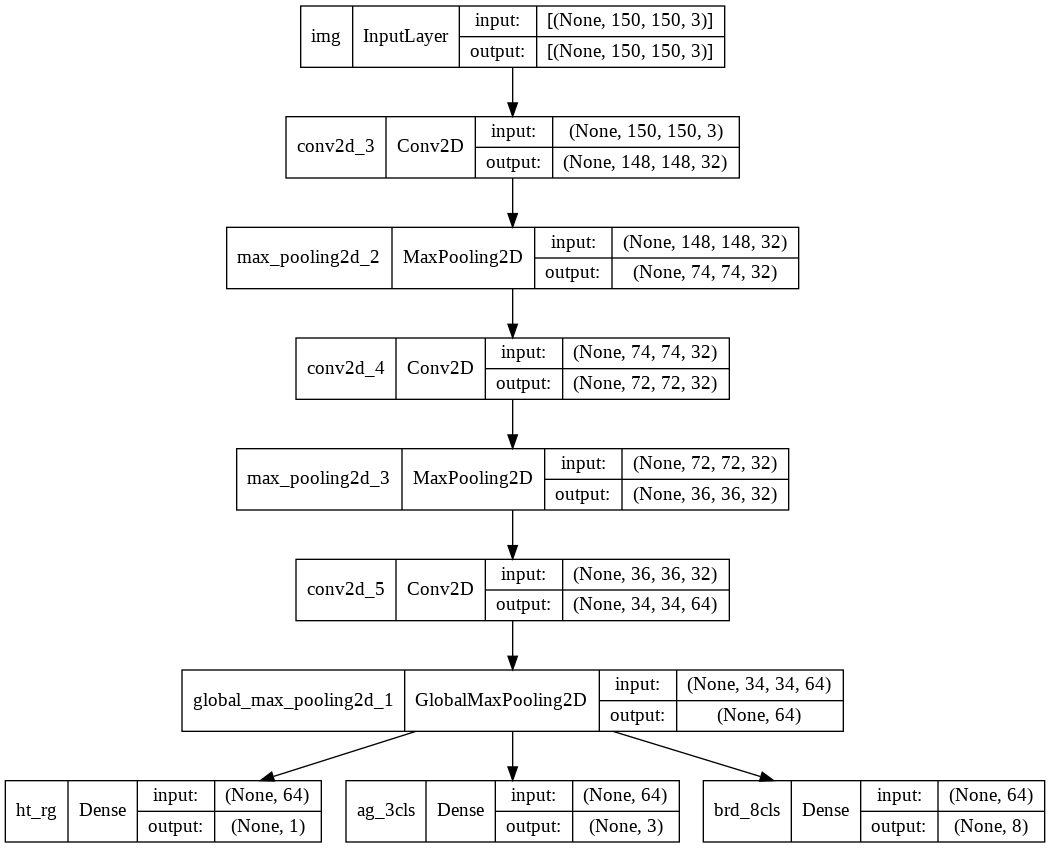

In [36]:
# encoder.output
keras.utils.plot_model(encoder, "encoder.png", show_shapes=True)

In [30]:
(tX0, tX1), (ty0, ty1, ty2, ty3) = data_loader(test_df, (150, 150, 3))

(359,)
(359,)
(359, 3)
(359, 8)
(359, 150, 150, 3)
(359, 3)


In [37]:
test_scores = encoder.evaluate(tX0, [ty1, ty2, ty3], verbose=2)

12/12 - 0s - loss: 18.1479 - ht_rg_loss: 16.3347 - ag_3cls_loss: 0.6967 - brd_8cls_loss: 1.1165 - ht_rg_mse: 16.3347 - ag_3cls_accuracy: 0.7326 - brd_8cls_accuracy: 0.6852 - 231ms/epoch - 19ms/step


In [38]:
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Test loss: 18.147891998291016
Test accuracy: 16.334692001342773


In [ ]:
p1, p2, p3 = encoder.predict([tf.expand_dims(tX0[0], 0), tf.expand_dims(tX1[0], 0)])

In [ ]:
# print(p0);ty0[0]

In [ ]:
print(p1);ty1[0]

[[45.881622]]


<tf.Tensor: shape=(), dtype=float32, numpy=48.0>

In [ ]:
print(p2.argmax());ty2[0].argmax()

0


1

In [ ]:
print(p3.argmax());ty3[0].argmax()

2


7

In [ ]:
Cattle are commonly raised as livestock for meat (beef or veal, see beef cattle), for milk (see dairy cattle), and for hides, which are used to make leather. They are used as riding animals and draft animals (oxen or bullocks, which pull carts, plows and other implements). Another product of cattle is their dung, which can be used to create manure or fuel.